In [81]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew,norm
from pandas.io.json import json_normalize
import numpy as np
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [82]:
def open_datos(url):
    with open(url, 'r') as file:
        json_data = json.load(file)
    df = pd.DataFrame(json_data)
    return df

In [83]:
data=pd.read_csv("/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/ANALISIS_SPREADS/BASES_DE_DATOS/AL30_COMPLETE_TASAS.csv")

In [84]:
time_series = pd.DataFrame(columns=['date','spread'])
data["SPREAD_COLOCAR_PLAZO_CERCANO"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)
data["SPREAD_COLOCAR_PLAZO_LEJANO"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)

data["SPREAD_TOMAR_PLAZO_CERCANO"] = (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100) - data["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]
data["SPREAD_TOMAR_PLAZO_LEJANO"] = (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100) - data["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]

data_general=data[["caucion_a_un_dia_ultimo_trade_tasa","SPREAD_COLOCAR_PLAZO_CERCANO","SPREAD_COLOCAR_PLAZO_LEJANO","SPREAD_TOMAR_PLAZO_CERCANO","SPREAD_TOMAR_PLAZO_LEJANO"]]

threshold_arbitrage=0

for index, row in data_general.iterrows():
    if  row["SPREAD_COLOCAR_PLAZO_CERCANO"] > row["SPREAD_COLOCAR_PLAZO_LEJANO"]:
         spread_colocar = row["SPREAD_COLOCAR_PLAZO_CERCANO"]
    else:
        spread_colocar = row["SPREAD_COLOCAR_PLAZO_LEJANO"]

    if row["SPREAD_TOMAR_PLAZO_CERCANO"] < row["SPREAD_TOMAR_PLAZO_LEJANO"]:
        spread_tomar = row["SPREAD_TOMAR_PLAZO_CERCANO"]
    else:
        spread_tomar = row["SPREAD_TOMAR_PLAZO_LEJANO"]

    if row["SPREAD_COLOCAR_PLAZO_CERCANO"] < threshold_arbitrage and row["SPREAD_COLOCAR_PLAZO_LEJANO"] < threshold_arbitrage  and row["SPREAD_TOMAR_PLAZO_CERCANO"] > threshold_arbitrage and row["SPREAD_TOMAR_PLAZO_LEJANO"] > threshold_arbitrage:
        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[0]})],ignore_index=True)
        
    elif spread_colocar > 0 and spread_tomar < 0:
        if spread_colocar > -spread_tomar:
            time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_colocar]})],ignore_index=True)
        else:
            time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_tomar]})],ignore_index=True)
    elif spread_colocar > 0:
        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_colocar]})],ignore_index=True)
    elif spread_tomar < 0:
        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_tomar]})],ignore_index=True)
    else:
        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[0]})],ignore_index=True)

In [85]:
time_series["spread"]

0       0
1       0
2       0
3       0
4       0
       ..
5605    0
5606    0
5607    0
5608    0
5609    0
Name: spread, Length: 5610, dtype: object

In [86]:
data_general

,caucion_a_un_dia_ultimo_trade_tasa,SPREAD_COLOCAR_PLAZO_CERCANO,SPREAD_COLOCAR_PLAZO_LEJANO,SPREAD_TOMAR_PLAZO_CERCANO,SPREAD_TOMAR_PLAZO_LEJANO
0,67.25,-0.331579,-0.303819,0.283472,0.264432
1,67.25,-0.331579,-0.303819,0.283472,0.264432
2,67.24,-0.406487,-0.359940,0.292747,0.386162
3,67.24,-0.397114,-0.359940,0.292747,0.376788
4,67.24,-0.397114,-0.359940,0.292747,0.376788
...,...,...,...,...,...
5605,69.00,-0.324072,-0.619344,0.304301,0.308743
5606,69.00,-0.324072,-0.619344,0.304301,0.308743
5607,69.00,-0.324072,-0.619344,0.304301,0.308743
5608,69.00,-0.324072,-0.619344,0.304301,0.308743


In [87]:
x=time_series["spread"]
y=data_general=data[["SPREAD_COLOCAR_PLAZO_CERCANO","SPREAD_COLOCAR_PLAZO_LEJANO","SPREAD_TOMAR_PLAZO_CERCANO","SPREAD_TOMAR_PLAZO_LEJANO"]]

<Axes: >

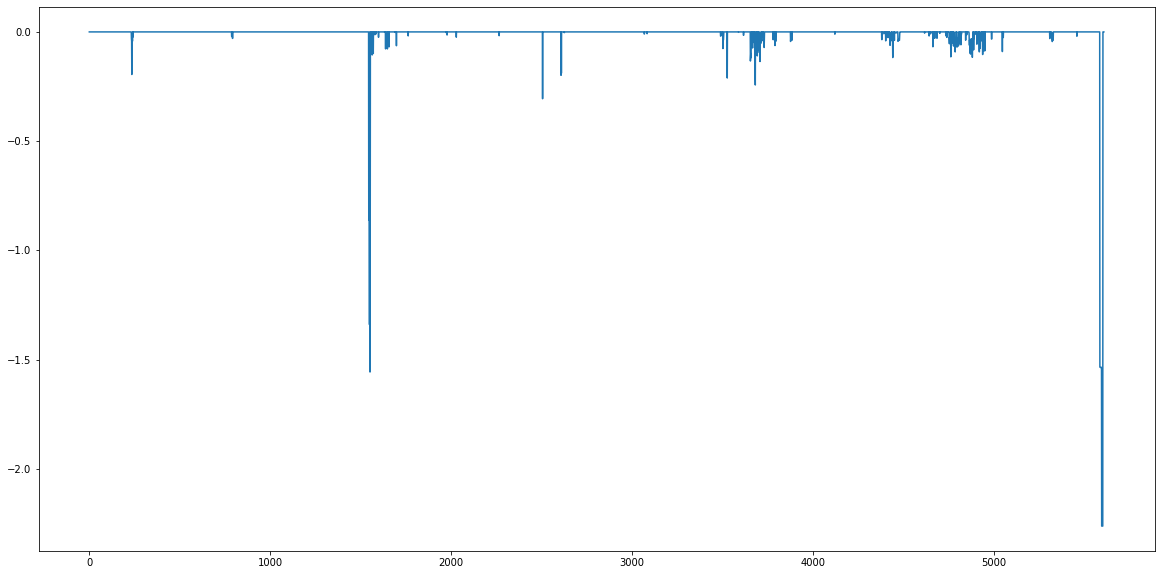

In [88]:
x.plot(figsize=(20,10))

In [89]:
x

0       0
1       0
2       0
3       0
4       0
       ..
5605    0
5606    0
5607    0
5608    0
5609    0
Name: spread, Length: 5610, dtype: object

In [90]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, entropy, iqr, median_abs_deviation
from scipy.spatial.distance import mahalanobis
import matplotlib.pyplot as plt

df=y
window_size = 60

# Create a new dataframe to store the scores
score_df = pd.DataFrame(index=df.index, columns=df.columns, dtype=int)

# Loop through the dataframe columns
for col in y.columns:
    # Calculate rolling metrics
    rolling_mean = df[col].rolling(window=window_size).mean()
    rolling_var = df[col].rolling(window=window_size).var()
    rolling_skew = df[col].rolling(window=window_size).apply(lambda x: skew(x), raw=False)
    rolling_kurt = df[col].rolling(window=window_size).apply(lambda x: kurtosis(x), raw=False)
    rolling_entropy = df[col].rolling(window=window_size).apply(lambda x: entropy(x), raw=False)
    rolling_abs_deviation = df[col].rolling(window=window_size).apply(lambda x: np.mean(np.abs(x - np.mean(x))), raw=False)
    rolling_iqr = df[col].rolling(window=window_size).apply(lambda x: iqr(x), raw=False)
    rolling_mad = df[col].rolling(window=window_size).apply(lambda x: median_abs_deviation(x), raw=False)


    # Calculate scores
    for i in range(window_size, len(df)):
        score = 0
        #if df[col][i] < rolling_mean[i]:
            #score += 1
        if df[col][i] > rolling_var[i]:
            score += 1 
        if df[col][i] > rolling_skew[i]:
            score += 1
        if df[col][i] > rolling_kurt[i]:
            score += 1
        if df[col][i] > rolling_entropy[i]:
            score += 1
        if df[col][i] > rolling_abs_deviation[i]:
            score += 1
        if df[col][i] > rolling_iqr[i]:
            score += 1
        if df[col][i] > rolling_mad[i]:
            score += 1

        score_df[col][i] = score

score_df.fillna(0, inplace=True)
score_df["Total"] = score_df["SPREAD_COLOCAR_PLAZO_CERCANO"] + score_df["SPREAD_COLOCAR_PLAZO_LEJANO"] + score_df["SPREAD_TOMAR_PLAZO_CERCANO"] + score_df["SPREAD_TOMAR_PLAZO_LEJANO"]
score_df

,SPREAD_COLOCAR_PLAZO_CERCANO,SPREAD_COLOCAR_PLAZO_LEJANO,SPREAD_TOMAR_PLAZO_CERCANO,SPREAD_TOMAR_PLAZO_LEJANO,Total
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
5605,2.0,0.0,5.0,4.0,11.0
5606,2.0,0.0,5.0,4.0,11.0
5607,2.0,0.0,5.0,4.0,11.0
5608,2.0,0.0,5.0,4.0,11.0


In [91]:
final_df=pd.DataFrame()
final_df["Total_Score"]=score_df["Total"]
final_df["Total_Spread"]=x

In [92]:
final_df

,Total_Score,Total_Spread
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
5605,11.0,0
5606,11.0,0
5607,11.0,0
5608,11.0,0


In [93]:
import pandas as pd

def find_trades_and_max_distance(time_series):
    start_index = None
    end_index = None
    max_distance = None
    trades = []

    for index, value in enumerate(time_series):
        if value <= -0.06 and start_index is None:
            start_index = index
            max_distance = value
        elif start_index is not None and value != 0:
            max_distance = min(max_distance, value)
        elif start_index is not None and value == 0:
            end_index = index+1
            trades.append({"Start Index": start_index, "End Index": end_index, "Maximum Abs Value": max_distance})
            start_index = None
            end_index = None
            max_distance = None

    return pd.DataFrame(trades)

time_series = final_df["Total_Spread"]
trades_df = find_trades_and_max_distance(time_series)

In [94]:
trades_df["Duracion_Trade"]=trades_df["End Index"]-trades_df["Start Index"]

In [95]:
trades_df

,Start Index,End Index,Maximum Abs Value,Duracion_Trade
0,235,241,-0.194943,6
1,1545,1552,-1.340144,7
2,1552,1558,-1.557314,6
3,1558,1560,-0.066058,2
4,1563,1568,-0.105601,5
5,1570,1572,-0.099157,2
6,1638,1640,-0.077659,2
7,1648,1650,-0.077803,2
8,1657,1659,-0.068744,2
9,1698,1700,-0.063291,2


# VISUALIZACION TRADES DURADEROS

<Axes: >

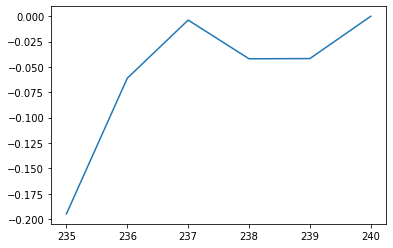

In [96]:
final_df["Total_Spread"][235:241].plot()

<Axes: >

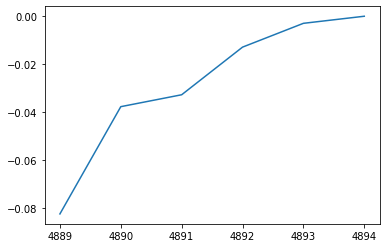

In [52]:
final_df["Total_Spread"][4889:4895].plot()

In [53]:
final_df["Total_Spread"][4889:4895]

4889   -0.082274
4890   -0.037635
4891   -0.032678
4892   -0.012854
4893   -0.002946
4894           0
Name: Total_Spread, dtype: object

<Axes: >

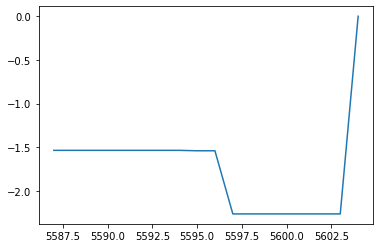

In [54]:
final_df["Total_Spread"][5587:5605].plot()

In [51]:
final_df["Total_Spread"][5587:5605]

5587   -1.535056
5588   -1.535056
5589   -1.535056
5590   -1.535056
5591   -1.535056
5592   -1.535056
5593   -1.535056
5594   -1.535056
5595   -1.539973
5596   -1.539973
5597   -2.262718
5598   -2.262718
5599   -2.262718
5600   -2.262718
5601   -2.262718
5602   -2.262718
5603   -2.262718
5604           0
Name: Total_Spread, dtype: object